## Initialization

### Imports

In [47]:
import os

import pandas as pd
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Read data with xarray

In [48]:
filename = "download.grib"
home_dir = os.path.expanduser('~')
file_path = os.path.join(home_dir, 'Code/star-struck/data/', filename)

ds = xr.open_dataset(file_path, engine='cfgrib')

# Convert temperature to Celcius
ds['t2m'] -= 273.15

ds['t2m'].attrs["units"] = "deg C"

ds['t2m'].attrs

{'GRIB_paramId': 167,
 'GRIB_dataType': 'fc',
 'GRIB_numberOfPoints': 7210,
 'GRIB_typeOfLevel': 'surface',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'regular_ll',
 'GRIB_NV': 0,
 'GRIB_Nx': 103,
 'GRIB_Ny': 70,
 'GRIB_cfName': 'unknown',
 'GRIB_cfVarName': 't2m',
 'GRIB_gridDefinitionDescription': 'Latitude/Longitude Grid',
 'GRIB_iDirectionIncrementInDegrees': 0.1,
 'GRIB_iScansNegatively': 0,
 'GRIB_jDirectionIncrementInDegrees': 0.1,
 'GRIB_jPointsAreConsecutive': 0,
 'GRIB_jScansPositively': 0,
 'GRIB_latitudeOfFirstGridPointInDegrees': 41.7,
 'GRIB_latitudeOfLastGridPointInDegrees': 34.8,
 'GRIB_longitudeOfFirstGridPointInDegrees': 19.37,
 'GRIB_longitudeOfLastGridPointInDegrees': 29.57,
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': '2 metre temperature',
 'GRIB_shortName': '2t',
 'GRIB_totalNumber': 0,
 'GRIB_units': 'K',
 'long_name': '2 metre temperature',
 'units': 'deg C',
 'standard_name': 'unknown'}

## Daily mean temperature

### Group by and reduce by mean step

In [49]:
temperature_arr = ds["t2m"]
mean_daily_temperature = temperature_arr.groupby("time").mean("step")

### Reduce by mean time

In [50]:
mean_temperature = mean_daily_temperature.mean(dim="time")

### Plot a map

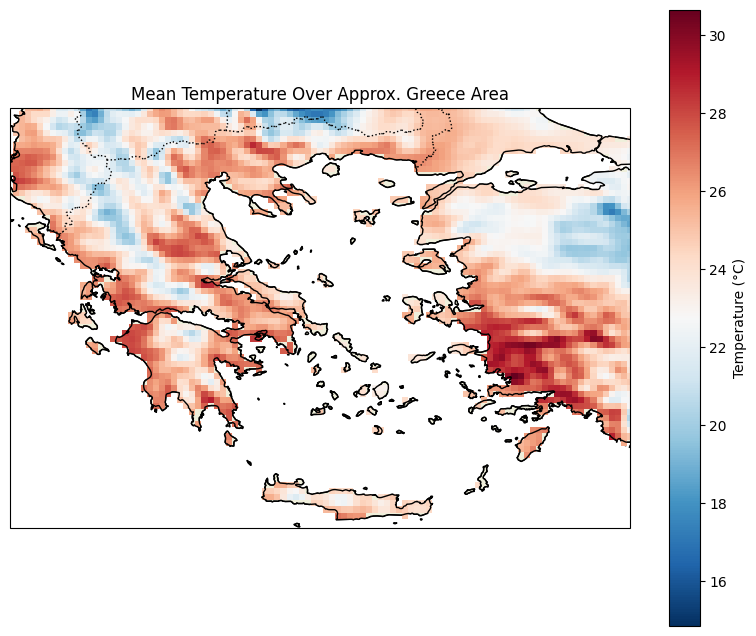

In [51]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 8))
ax.set_extent([19.37, 29.57, 34.8, 41.7])  # [lon_min, lon_max, lat_min, lat_max] covering approx. Greece area

# Plot the mean temperature data
mean_temperature.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', cbar_kwargs={'label': 'Temperature (°C)'})

# Adding coastlines and land features for better visualization
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Mean Temperature Over Approx. Greece Area')

plt.show()